In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
df = pd.read_csv(
    '/content/creditcard.csv',
    engine='python',
    on_bad_lines='skip'
)


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [5]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,761.035750,-0.284195,0.266886,0.848005,0.151216,-0.077457,0.050205,0.138347,-0.058795,0.012145,...,-0.011611,-0.144319,-0.043045,0.013864,0.108372,0.049408,0.027197,-0.002018,68.602469,0.001008
std,451.034025,1.353508,1.142026,1.012645,1.264932,1.272512,1.274204,1.140750,0.966493,0.900828,...,0.653200,0.588201,0.352890,0.601370,0.407874,0.454251,0.369485,0.272864,241.677019,0.031734
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,366.000000,-1.045512,-0.204111,0.280517,-0.670513,-0.576269,-0.691393,-0.286991,-0.172322,-0.479310,...,-0.226941,-0.547474,-0.181176,-0.350802,-0.151028,-0.281097,-0.049467,-0.021053,4.950000,0.000000
50%,750.000000,-0.437621,0.314294,0.864505,0.190698,-0.154843,-0.198063,0.117535,0.037598,-0.034097,...,-0.087329,-0.152603,-0.057041,0.093137,0.131713,0.036992,0.023011,0.022722,15.090000,0.000000
75%,1161.000000,1.095047,0.926126,1.486942,1.002546,0.376901,0.389714,0.569262,0.279513,0.449706,...,0.083530,0.252698,0.064859,0.428755,0.383339,0.303731,0.140481,0.090920,63.650000,0.000000
max,1526.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [6]:
df['Class'].value_counts()


,count
Class,
0.0,1983
1.0,2


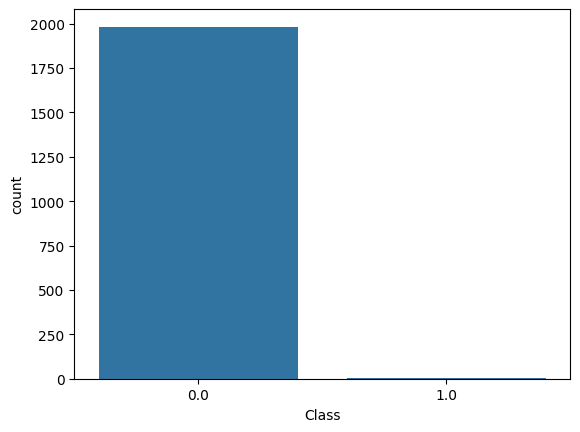

In [7]:
sns.countplot(x='Class', data=df)
plt.show()


In [8]:
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
scaler = StandardScaler()

df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [10]:
X = df.drop('Class', axis=1)
y = df['Class']


In [12]:
print(X.shape)
print(y.shape)
print(y.value_counts())


(1986, 30)
(1986,)
Class
0.0    1983
1.0       2
Name: count, dtype: int64


In [13]:
df = df.dropna()

X = df.drop('Class', axis=1)
y = df['Class']


In [14]:
print(y.value_counts())


Class
0.0    1983
1.0       2
Name: count, dtype: int64


In [15]:
y = y.astype(int)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [17]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [18]:
df.columns = df.columns.str.strip()


In [19]:
from sklearn.model_selection import train_test_split

df = df.dropna()
df['Class'] = df['Class'].astype(int)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(1588, 30) (397, 30)


In [20]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:,1]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


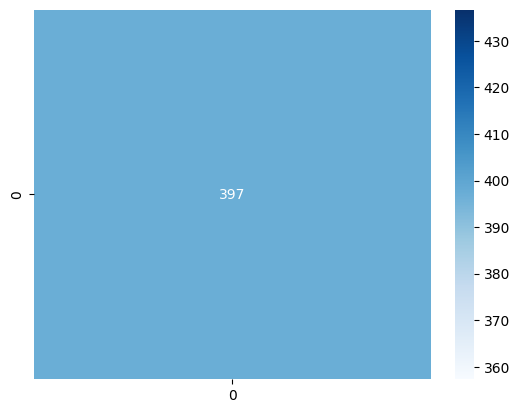

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       397

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



In [24]:
roc_auc_score(y_test, y_prob)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


nan

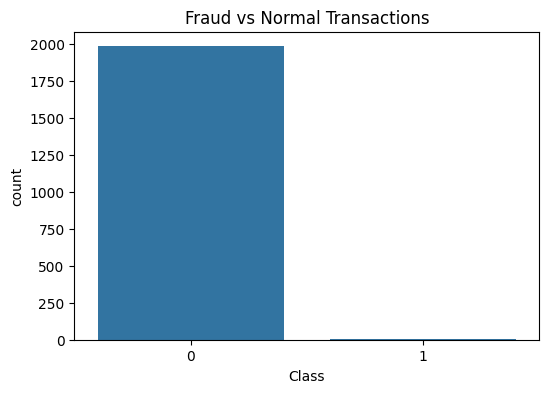

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()


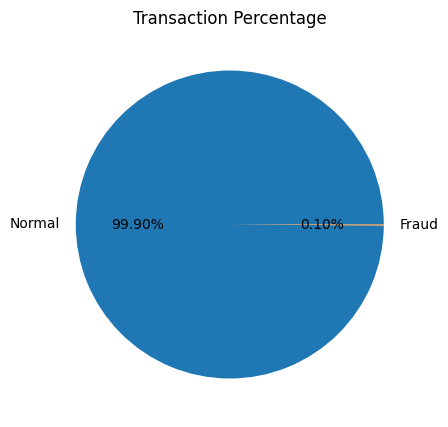

In [26]:
df['Class'].value_counts().plot.pie(
    autopct='%1.2f%%',
    figsize=(5,5),
    labels=['Normal','Fraud']
)
plt.title("Transaction Percentage")
plt.ylabel("")
plt.show()


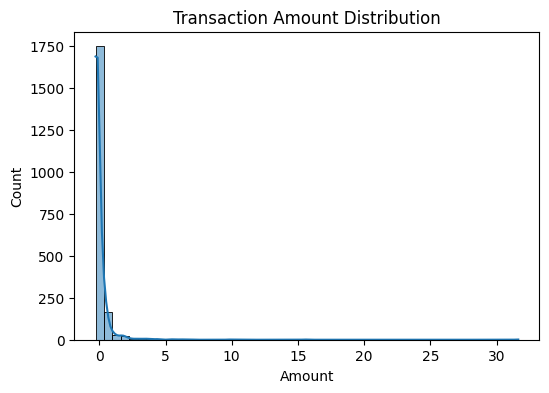

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


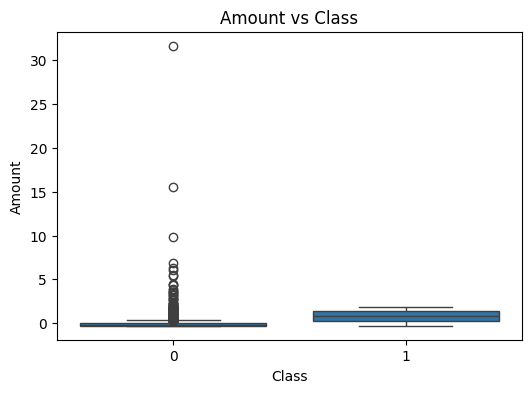

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount vs Class")
plt.show()


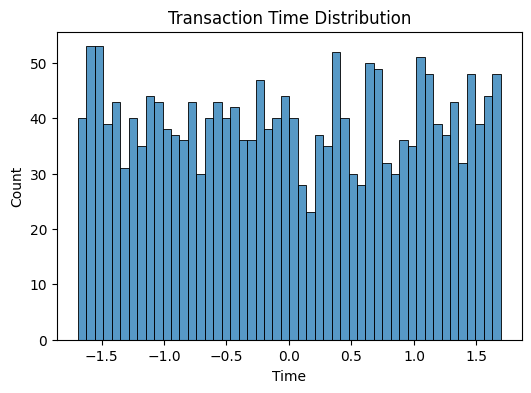

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df['Time'], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


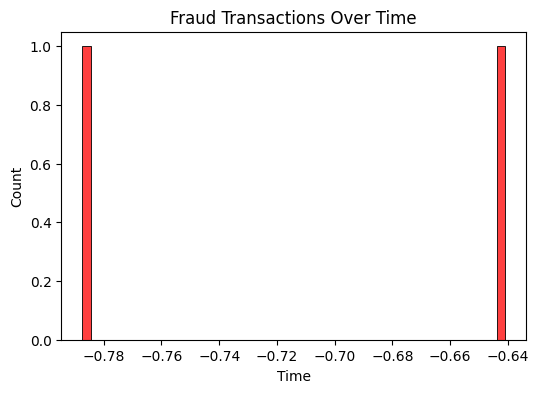

In [30]:
fraud = df[df['Class'] == 1]

plt.figure(figsize=(6,4))
sns.histplot(fraud['Time'], bins=50, color='red')
plt.title("Fraud Transactions Over Time")
plt.show()


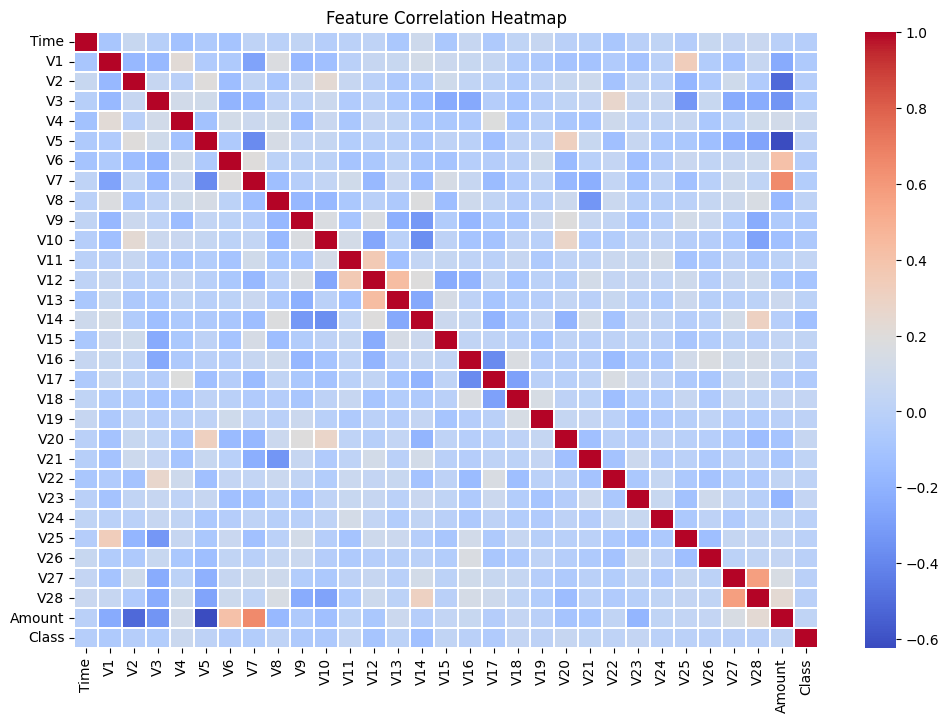

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()


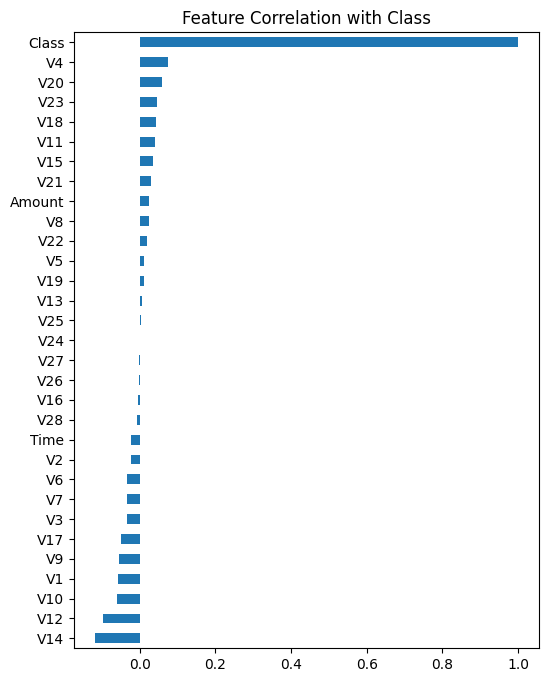

In [32]:
corr = df.corr()['Class'].sort_values()

plt.figure(figsize=(6,8))
corr.plot(kind='barh')
plt.title("Feature Correlation with Class")
plt.show()


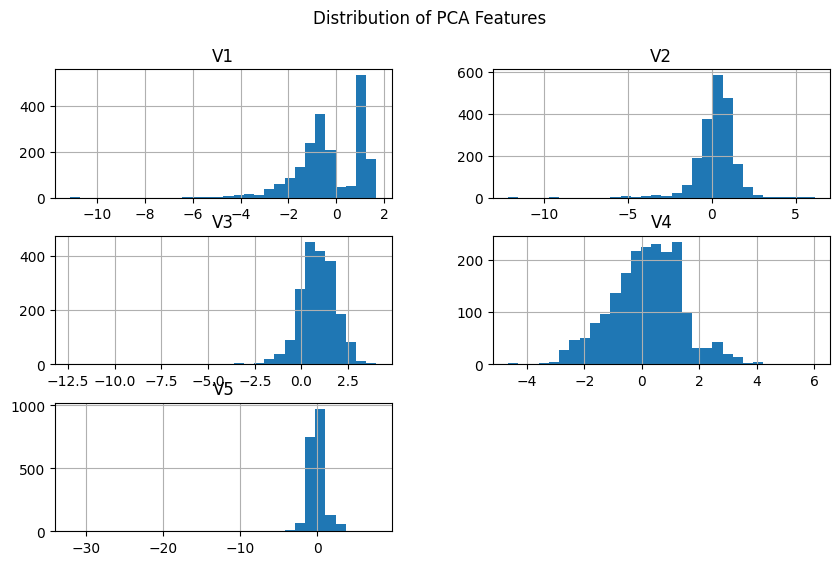

In [33]:
features = ['V1','V2','V3','V4','V5']

df[features].hist(figsize=(10,6), bins=30)
plt.suptitle("Distribution of PCA Features")
plt.show()


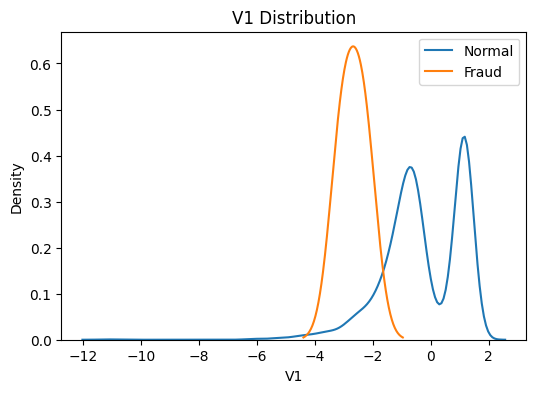

In [34]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['Class']==0]['V1'], label='Normal')
sns.kdeplot(df[df['Class']==1]['V1'], label='Fraud')
plt.title("V1 Distribution")
plt.legend()
plt.show()
